# Notebook setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# standard imports
import os

# third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# local imports

In [3]:
sns.set()

# Loading the data

In [4]:
data = datasets.load_iris() 

In [5]:
data.keys()
# shows us what we have access to in the dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Creating a pandas dataframe from the data

In [7]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])

In [8]:
df['target'] = data['target']

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Basic descriptive statistics

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Distributions of feautres and target

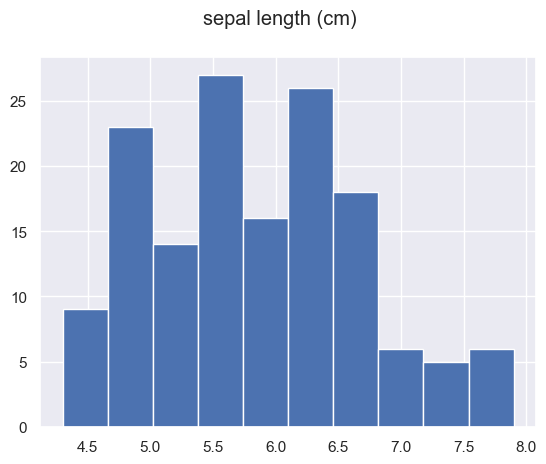

In [11]:
col = 'sepal length (cm)'
df['sepal length (cm)'].hist()
plt.suptitle(col)
plt.show()

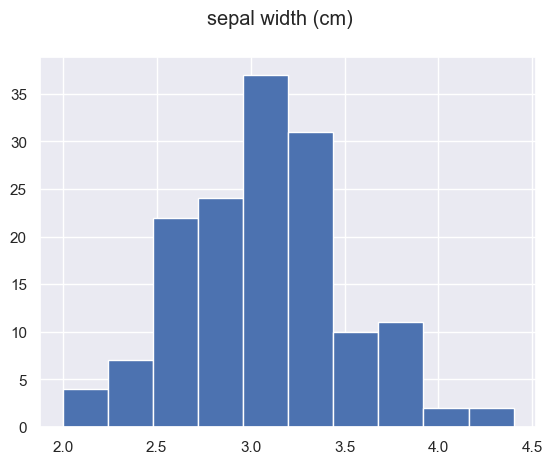

In [12]:
col = 'sepal width (cm)'
df['sepal width (cm)'].hist()
plt.suptitle(col)
plt.show()

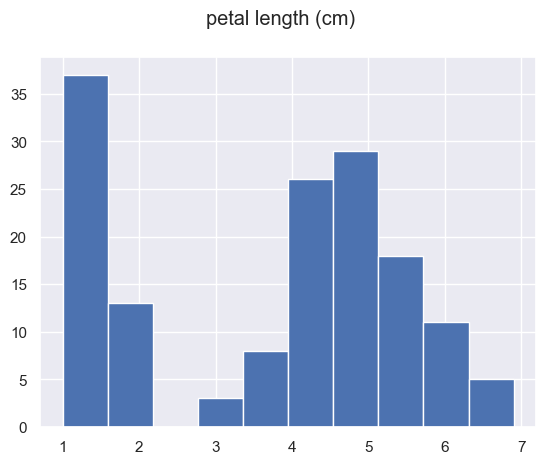

In [13]:
col = 'petal length (cm)'
df['petal length (cm)'].hist()
plt.suptitle(col)
plt.show()

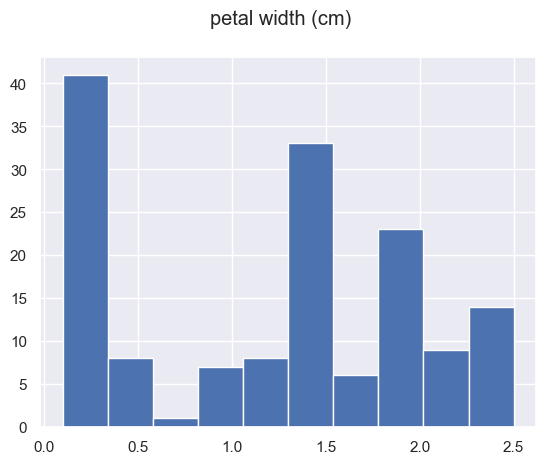

In [14]:
col = 'petal width (cm)'
df['petal width (cm)'].hist()
plt.suptitle(col)
plt.show()

# plotting data feautres with target

In [15]:
# creating a new column with the species name
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

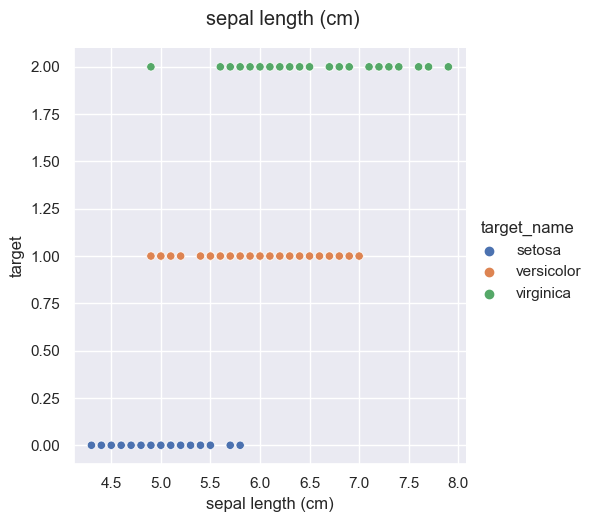

In [16]:
col = 'sepal length (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_ = plt.suptitle(col, y=1.04)

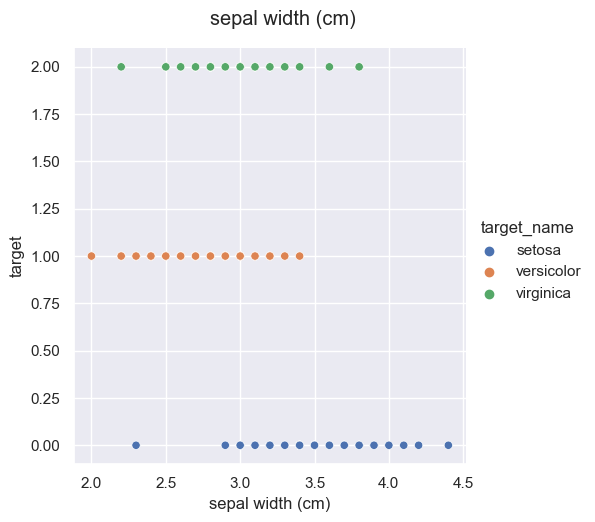

In [17]:
col = 'sepal width (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_ = plt.suptitle(col, y=1.04)

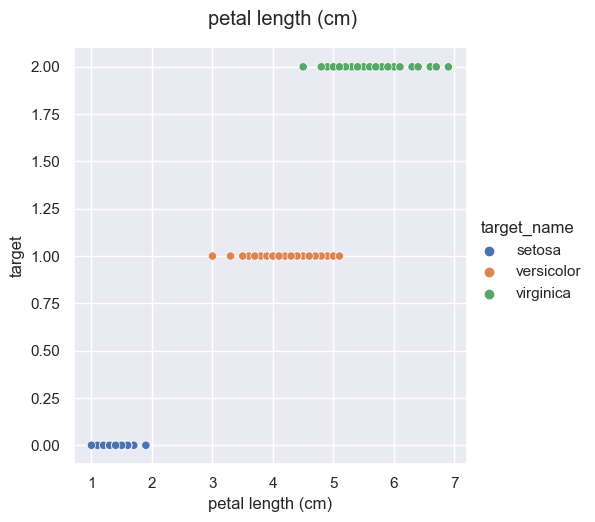

In [18]:
col = 'petal length (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_ = plt.suptitle(col, y=1.04)

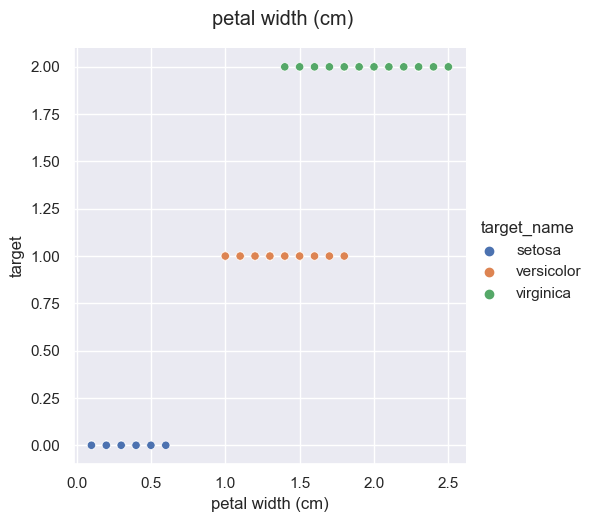

In [19]:
col = 'petal width (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_ = plt.suptitle(col, y=1.04)

# Exploratory Data Analysis(EDA) - plotting

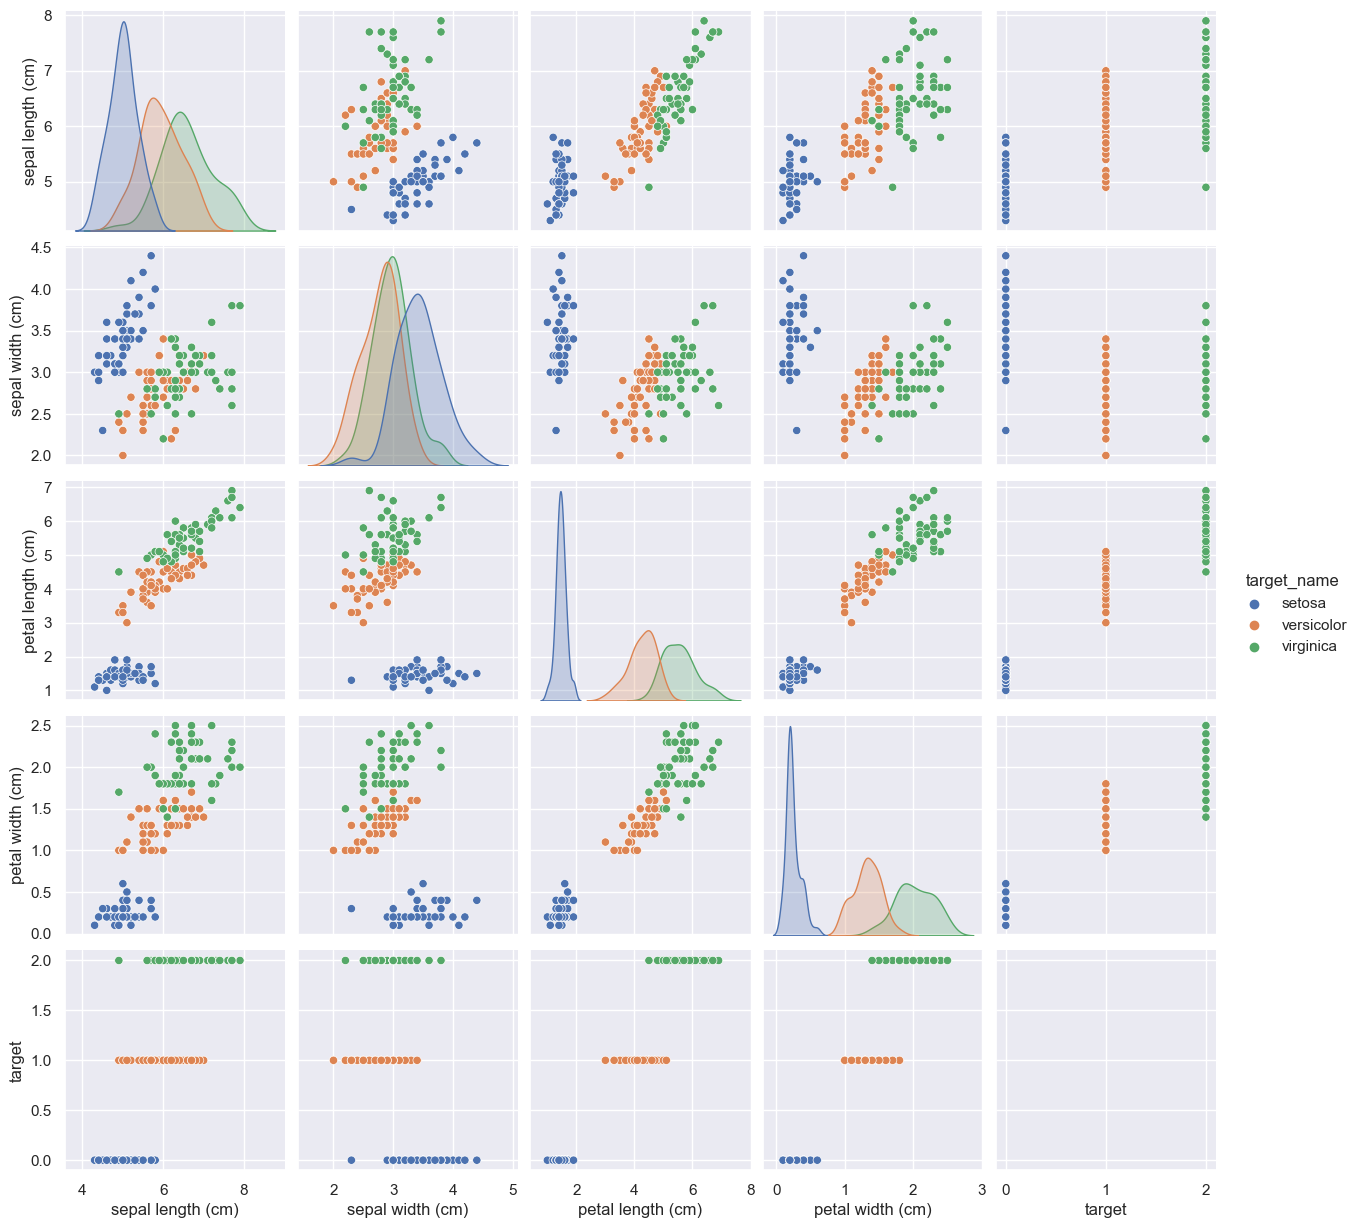

In [20]:
sns.pairplot(df, hue='target_name')

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [23]:
df_train.shape

(112, 6)

In [24]:
df_test.shape

(38, 6)

In [25]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
81,5.5,2.4,3.7,1.0,1,versicolor
116,6.5,3.0,5.5,1.8,2,virginica
38,4.4,3.0,1.3,0.2,0,setosa
62,6.0,2.2,4.0,1.0,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica


# preparing data for modeling

In [26]:
x_train = df_train.drop(columns=['target', 'target_name']).values
y_train = df_train['target'].values

In [27]:
y_train

array([1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2,
       1, 1, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2,
       2, 0])

In [28]:
# predicts the irises species given the petal length

def single_feature_prediction(petal_length):
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [29]:
x_train[:, 2]

array([3.7, 5.5, 1.3, 4. , 6. , 1.1, 1.4, 4.4, 4.6, 3.3, 1.2, 4.5, 1.7,
       5.2, 1.5, 4.5, 1.4, 5.8, 1.4, 4.3, 5.8, 4.7, 4.2, 5.6, 5.1, 5.7,
       4.1, 4.4, 1.4, 1.6, 5.3, 1.6, 1.3, 4.5, 1.5, 6.3, 4.9, 5.9, 1.6,
       5.6, 4.2, 3. , 5. , 5.1, 5.1, 6.4, 1.5, 1.3, 1.4, 5.1, 6.9, 3.6,
       1.6, 5.6, 1.5, 5.7, 5.8, 5.6, 5.1, 1.4, 4.1, 4.5, 5.1, 1.5, 1.2,
       5.4, 3.9, 4.5, 1.5, 5.6, 4.5, 1.3, 3.8, 5.9, 1.7, 1.4, 1.5, 1.4,
       4.2, 4.8, 1.3, 3.9, 4. , 1.5, 1.6, 1.6, 1.3, 6. , 6.1, 1.5, 6.6,
       4.9, 1.4, 4.6, 5. , 5.3, 4.9, 1.4, 4.7, 1.5, 1.6, 6.7, 3.5, 3.5,
       1.4, 5.1, 4.4, 4.9, 1.5, 5.1, 5.2, 1.3])

In [30]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in x_train[:, 2]])

In [31]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [32]:
print(f'manual model accuracy: {manual_model_accuracy * 100:2f}%')

manual model accuracy: 96.428571%


In [33]:
from sklearn.linear_model import LogisticRegression

# Using a validation set to evaluate our model

In [34]:
model = LogisticRegression(max_iter=200)

In [35]:
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

In [36]:
xt.shape

(84, 4)

In [37]:
model.fit(xt, yt)

LogisticRegression(max_iter=200)

In [38]:
y_pred = model.predict(xv)

In [39]:
np.mean(y_pred == yv)

1.0

In [40]:
x_train[1]

array([6.5, 3. , 5.5, 1.8])

In [41]:
y_train[1]

2

In [42]:
model.score(x_train, y_train)

0.9821428571428571

# using cross-validation to evaluate our model

In [43]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [44]:
model = LogisticRegression(max_iter=200)

In [45]:
# this returns the accuracies, not the predictions themselves

accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

In [46]:
np.mean(accuracies)

0.9727272727272727

# where are we misclassifying points?

In [47]:
# ....how we get the actual predictions... with the cross_val_predict
y_pred = cross_val_predict(model, x_train, y_train, cv=5)

In [48]:
predicted_correctly_mask = y_pred == y_train

In [49]:
predicted_correctly_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [50]:
not_predicted_correctly = ~predicted_correctly_mask

In [51]:
x_train[not_predicted_correctly]

array([[6. , 2.7, 5.1, 1.6],
       [4.9, 2.5, 4.5, 1.7],
       [6.7, 3. , 5. , 1.7]])

In [52]:
df_predictions = df_train.copy()

In [53]:
df_predictions['correct_prediction'] = predicted_correctly_mask

In [54]:
df_predictions['prediction'] = y_pred

In [80]:
df_predictions['prediction_label'] = df_predictions['prediction'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [56]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
81,5.5,2.4,3.7,1.0,1,versicolor,True,1,versicolor
116,6.5,3.0,5.5,1.8,2,virginica,True,2,virginica
38,4.4,3.0,1.3,0.2,0,setosa,True,0,setosa
62,6.0,2.2,4.0,1.0,1,versicolor,True,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica,True,2,virginica


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

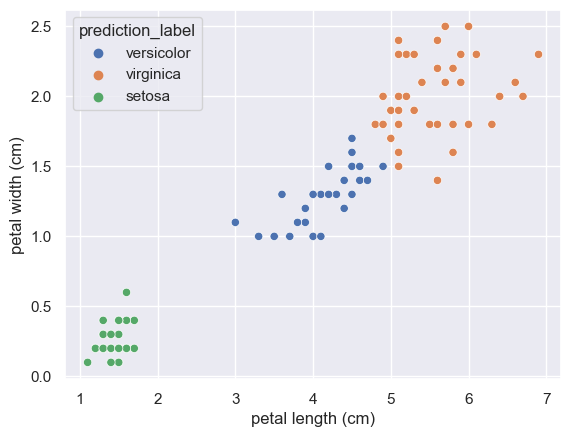

In [57]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='prediction_label', data=df_predictions)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

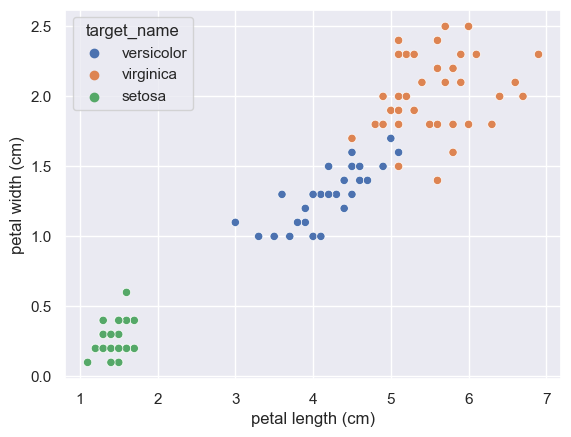

In [58]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target_name', data=df_predictions)

In [59]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature): 
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='prediction_label', data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='target_name', data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='correct_prediction', data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    
    plt.show()

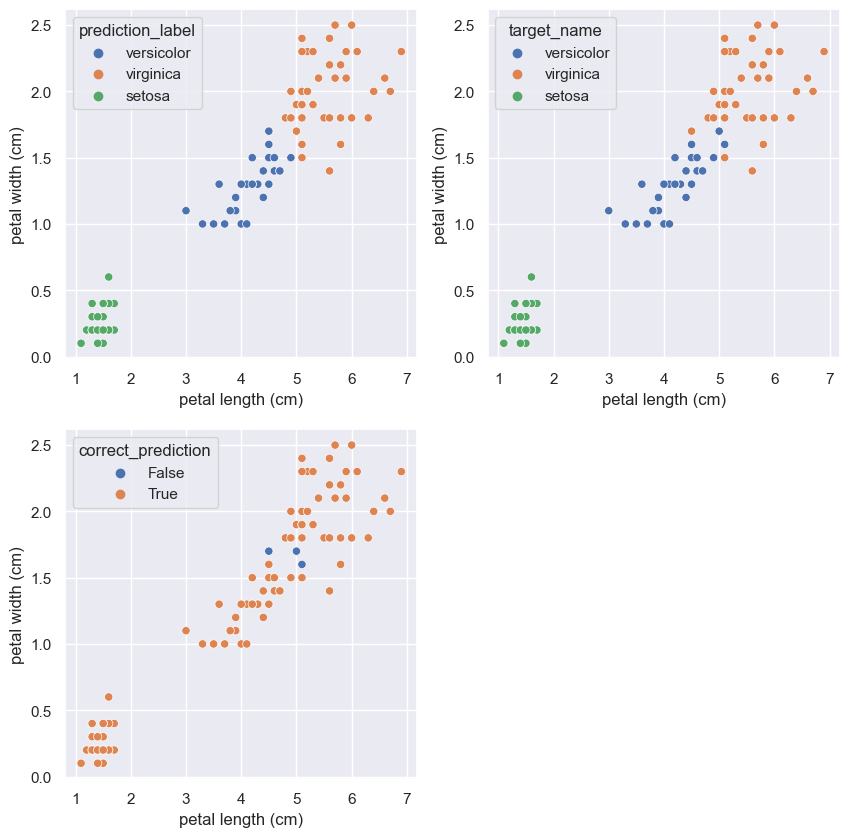

In [60]:
plot_incorrect_predictions(df_predictions, 'petal length (cm)', 'petal width (cm)')

# Model Tuning

trying to see if we can get a better model by tweaking a few things

In [63]:
for reg_param in (1, 1.4, 2, 2.3, 2.5, 3):
    print (reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f'Accuracy: {np.mean(accuracies) * 100:2f}%')

1
Accuracy: 97.272727%
1.4
Accuracy: 97.272727%
2
Accuracy: 97.272727%
2.3
Accuracy: 97.272727%
2.5
Accuracy: 97.272727%
3
Accuracy: 96.403162%


# Final Model

In [68]:
model = LogisticRegression(max_iter=200, C=2)

# How well does our data run on the test set

In [69]:
x_test = df_test.drop(columns=['target', 'target_name']).values
y_test = df_test['target'].values

In [70]:
x_test.shape

(38, 4)

In [71]:
y_test

array([2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1])

### Train final model using full training dataset

In [84]:
model.fit(x_train, y_train)

LogisticRegression(C=2, max_iter=200)

In [85]:
y_test_pred = model.predict(x_test)

In [86]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [87]:
print(f'test set accuracy: {test_set_accuracy * 100:.2f}')

test set accuracy: 97.37


In [88]:
test_set_correctly_classified

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [92]:
df_predictions_test = df_test.copy()
df_predictions_test['correct_prediction'] = test_set_correctly_classified
df_predictions_test['prediction'] = y_test_pred
df_predictions_test['prediction_label'] = df_predictions_test['prediction'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [93]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
138,6.0,3.0,4.8,1.8,2,virginica,True,2,virginica
112,6.8,3.0,5.5,2.1,2,virginica,True,2,virginica
76,6.8,2.8,4.8,1.4,1,versicolor,True,1,versicolor
117,7.7,3.8,6.7,2.2,2,virginica,True,2,virginica
72,6.3,2.5,4.9,1.5,1,versicolor,True,1,versicolor


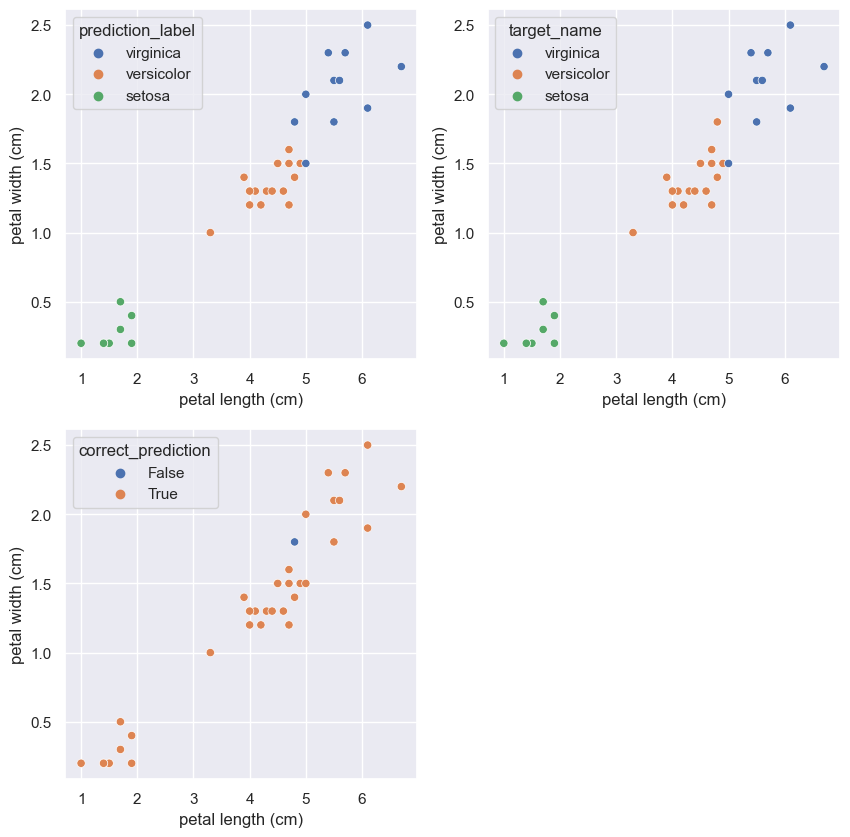

In [94]:
plot_incorrect_predictions(df_predictions_test, x_axis_feature='petal length (cm)', y_axis_feature='petal width (cm)')

# In conclusion

In conclusion we achieved a 97% accuracy on the test dataset with Logistic Regression model with these model parameters:

```
    LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
    class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0,
    warm_start=False, n_jobs=None, l1_ratio=None )
```